### В проекте используется датасет imdb, содержащий информацию по 5 тыс. фильмам

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
row_data = pd.read_csv('metadata.csv', sep = ',')
row_data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

#### Уберем дубликаты и фильмы, которые короче 20 мин и длиннее 300

In [142]:
mdata = row_data.drop_duplicates(['movie_title', 'director_name', 'country', 'title_year'])
mdata = mdata.loc[(mdata['duration'].between(20, 300)), :]

In [10]:
mdata['duration'].value_counts().tail(2)

20.0     1
293.0    1
Name: duration, dtype: int64

In [11]:
mdata.shape

(4896, 28)

####  Выведем общую статистическую информацию по датасету:

In [12]:
mdata.describe().apply(round)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4852.0,4896.0,4800.0,4875.0,4889.0,4051.0,4896.0,4896.0,4883.0,4879.0,4.426000e+03,4797.0,4883.0,4896.0,4584.0,4896.0
mean,138.0,107.0,693.0,632.0,6509.0,47678154.0,82985.0,9601.0,1.0,269.0,3.931898e+07,2002.0,1626.0,6.0,2.0,7375.0
std,120.0,24.0,2837.0,1629.0,15132.0,67386136.0,138505.0,18193.0,2.0,373.0,2.087426e+08,12.0,4019.0,1.0,1.0,19240.0
min,1.0,20.0,0.0,0.0,0.0,162.0,5.0,0.0,0.0,1.0,2.180000e+02,1916.0,0.0,2.0,1.0,0.0
25%,50.0,93.0,7.0,132.0,610.0,5066248.0,8519.0,1400.0,0.0,64.0,6.000000e+06,1999.0,278.0,6.0,2.0,0.0
50%,109.0,103.0,48.0,366.0,982.0,25052000.0,33705.0,3050.0,1.0,154.0,1.985000e+07,2005.0,593.0,7.0,2.0,160.0
75%,192.0,118.0,190.0,633.0,11000.0,61196940.0,94147.0,13626.0,2.0,321.0,4.300000e+07,2011.0,912.0,7.0,2.0,2000.0
max,813.0,300.0,23000.0,23000.0,640000.0,760505847.0,1689764.0,656730.0,43.0,5060.0,1.221550e+10,2016.0,137000.0,10.0,16.0,349000.0


#### Рассмотрим фильмы в разрезе продолжительности

В Датасете предварительно вычистили фильмы короче 20 мин (короче, чем 1 серия сериала и длиннее 300 мин, как выбросы).

Средняя продолжительность фильмов 107 минут, что только 25% фильмов короче 93 минут и меньше 25% длиннее 2х часов.

Самый популярный формат фильмов - 1,5 часа.

Продолжительность фильмов подчинена закону нормального распределения. 


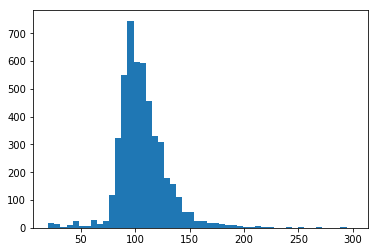

In [17]:
plt.hist(mdata['duration'], bins = 50)
plt.show()

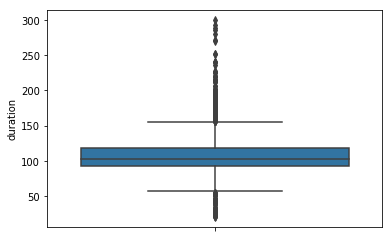

In [18]:
sns.boxplot(mdata['duration'], orient='v')
plt.show()

In [20]:
mdata['duration'].mode()

0    90.0
dtype: float64

#### Динамика производства фильмов

In [80]:
mdata['title_year'].mode()

0    2009.0
dtype: float64

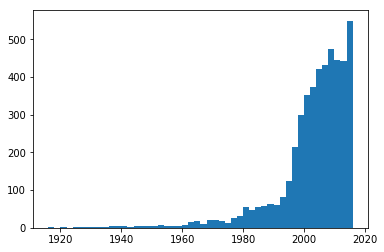

In [76]:
plt.hist(mdata['title_year'], bins = 50)
plt.show()

Видим, что   
   фильмы в выборке представлены с 1916 года по 2016.
   Больше всего фильмов 2009 года
   В выборке 25% фильмов до 1999. С 2000 на каждые 5 лет приходится 25% фильмов.

В целом, выборка отражает поведение индустрии производства фильмов и поведение зрителей.
Примерно до 1995 - линейный рост производства фильмов. 
С появлением цифры и удешевление производства идет бум производства до 2005 - 2007 (квадратичный рост).
Дальше - небольшой линейный рос, близкий к костанте. Показатель "потолка" производства на данном рынке при данных условиях.

С другой стороны, график отражает потребительсоке поведение. Зритель чаще выбирает к просмотру новые фильмы. Старые ленты, уходят из выборок, за исключением знаковых, культовых лент.


#### Рейтинги

In [24]:
mdata['imdb_score'].mode()

0    6.7
dtype: float64

In [25]:
mdata['imdb_score'].describe()

count    4896.000000
mean        6.437112
std         1.125549
min         1.600000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.500000
Name: imdb_score, dtype: float64

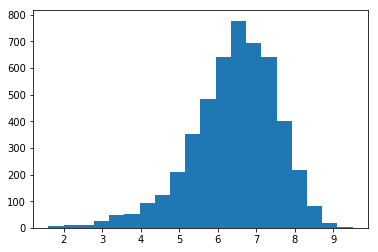

In [23]:
plt.hist(mdata['imdb_score'], bins = 20)
plt.show()

По рейтингам представлены несколько систем оценок: лайки в фейсбуке по категориям, рейтинг imdb, aspect_ratio.
  imdb_score - внутренний рейтинг imdb, присваевается каждому фильму. 
  
Рейтинги фильмов подчинены закону нормального распределения.
  
  В выборку попали фильмы с рейтингом от 1.6 до 9.5.  Т.е. фактически 8-ми бальная система данной выборки.
  Средняя оценка 6,4. Чаще всего оценку фильму дают 6.7 баллов.
  25% фильмов имеют рейтинг ниже 5.8. 50% выборки имеют рейтинг от 5.8 до 7.2 включительно. 
  Только 25% фильмов попадают в категорию от 7.2 до 9.5 баллов. 
  
Т.е при заявленной 10 бальной шкале, активно используется диапазон оценок от 4 до 8.5.
Если предположить, что в генеральной совокупности средняя оценка фильма 5, то в нашу выборку, в целом, попали более качественные фильмы.
Если в генеральной совокупности средняя  и мода выше 6, тогда получается, что люди склонны оценивать фильмы позитивно. Однако высшая оценка не поставлена ни 1 фильму из 5000.
Если на словах, средняя оценка: фильм неплохой,но... Если фильм замечательный, то оценка будет: фильм отличный, но...

#### Gross (кассовые продажи)

Для чистоты анализа уберем из выборки строки без показателя кассовых продаж

In [81]:
gross_imdb = mdata.loc[(mdata['gross'] != 'NaN'), :]

In [82]:
gross_imdb['gross'].mode()

0    3000000.0
1    8000000.0
dtype: float64

In [ ]:
2 моды: 3 и 8 млн. у.е.

In [83]:
gross_imdb['gross'].describe().apply(round)

count         4051
mean      47678154
std       67386136
min            162
25%        5066248
50%       25052000
75%       61196940
max      760505847
Name: gross, dtype: int64

Самые прибыльные фильмы

In [106]:
top_g = gross_imdb.loc[(gross_imdb['gross'] > 174000000), :]

In [107]:
top_g['gross'].sum() / gross_imdb['gross'].sum()

0.2932764771777049

In [108]:
top_g['gross'].count() / gross_imdb['gross'].count()

0.05282646260182671

Фильмы с наименьшим показателем gross

In [139]:
low_g = gross_imdb.loc[(gross_imdb['gross'] < 5000000), :]

In [140]:
low_g['gross'].sum() *100 / gross_imdb['gross'].sum()

0.690621513073138

In [141]:
low_g['gross'].count() / gross_imdb['gross'].count()

0.24784003949642064

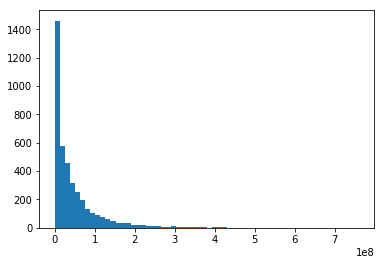

In [84]:
plt.hist(gross_imdb['gross'], bins = 60)
plt.show()

По данным сложно сказать в какой валюте представлен показатель gross.
В целом, выборка выглядит следующим образом:
Разброс от 162 до 761 млн у.е. Т.е. разброс почти в 5 млн раз.
5% топ фильмов (дороже 174 млн. у.е.) в выборке приносят 29% продаж.
10% фильмов (дешевле 374 тыс у.е.) составляют 0.025% продаж.

Другими словами, только 5% фильмов приносят сверхвысокую кассу.
А 70% фильмов имеют кассу ниже 5 млн у.е. и в общем котле составляют лишь 0.24% от сборов.

Посмотрим если корреляция между показателями:

In [41]:
corr_gross = gross_imdb.loc[:, ['gross', 'imdb_score']].corr()
corr_gross

,gross,imdb_score
gross,1.000000,0.199825
imdb_score,0.199825,1.000000


Корреляция: 'gross' vs 'imdb_score' 0.19. Что не дает основания сказать, что чем больше касса фильма, тем выше его рейтинг в базе imdb или наоборот. 

In [42]:
corr_gb = gross_imdb.loc[:, ['gross', 'budget']].corr()
corr_gb

,gross,budget
gross,1.000000,0.096652
budget,0.096652,1.000000


Корреляция: 'gross' vs 'budget' показывает слабую корреляцию в 0.096. Это говорит о том, что бюджет фильма не гарантирует его кассовые сборы.

In [45]:
corr_glike = gross_imdb.loc[:, ['gross', 'movie_facebook_likes']].corr()
corr_glike

,gross,movie_facebook_likes
gross,1.000000,0.366536
movie_facebook_likes,0.366536,1.000000


Корреляция: 'gross' vs 'movie_facebook_likes' показывает более сильную корреляцию в 0.366. Возможно, не прямая связь, но она есть. Например, чем больше человек посмотрели фильм и он им понравился, тем больше лайков в соц сетях, тем больше людей пойдут делать еще большую кассу и будет еще больше лайков.

#### Представленность по странам

In [34]:
mdata['country'].value_counts().head(20)

USA             3702
UK               430
France           154
Canada           124
Germany           94
Australia         52
Spain             33
India             31
China             28
Italy             23
Japan             22
Hong Kong         17
Mexico            17
South Korea       14
New Zealand       13
Ireland           12
Denmark           11
Russia            11
South Africa       8
Brazil             8
Name: country, dtype: int64

На США приходится 75% фильмов, на следующие 4 страны еще 16%. Получается, что имеющийся датасет не репрезентативный в плане представленности стран. Поэтому рассмотрим Топ-3 страны по отдельности.

#### США

In [36]:
usa_imdb = mdata.loc[(mdata['country'] == 'USA'), :]

In [12]:
usa_imdb.describe().apply(round)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3673.0,3705.0,3638.0,3698.0,3707.0,3154.0,3711.0,3711.0,3699.0,3698.0,3416.0,3638.0,3704.0,3711.0,3491.0,3711.0
mean,142.0,106.0,830.0,718.0,7235.0,54530550.0,90471.0,10758.0,1.0,284.0,35199197.0,2002.0,1841.0,6.0,2.0,7799.0
std,123.0,24.0,3181.0,1766.0,16762.0,70913204.0,147696.0,19970.0,2.0,385.0,42043172.0,13.0,4367.0,1.0,1.0,20113.0
min,1.0,7.0,0.0,0.0,0.0,703.0,5.0,0.0,0.0,1.0,218.0,1916.0,0.0,2.0,1.0,0.0
25%,51.0,93.0,8.0,192.0,700.0,9592406.0,9856.0,1784.0,0.0,73.0,6000000.0,1998.0,366.0,6.0,2.0,0.0
50%,112.0,103.0,52.0,428.0,1000.0,31837374.0,38893.0,3648.0,1.0,166.0,20000000.0,2005.0,655.0,6.0,2.0,181.0
75%,195.0,117.0,209.0,681.0,12000.0,71346990.0,105295.0,14827.0,2.0,341.0,48250000.0,2010.0,956.0,7.0,2.0,3000.0
max,813.0,330.0,23000.0,23000.0,640000.0,760505847.0,1689764.0,656730.0,43.0,4667.0,300000000.0,2016.0,137000.0,9.0,16.0,349000.0


Поскольку фильмов производства США - это 75% базы, то и частная выборка совпадает с "генеральной совокупностью".

#### Англия

In [143]:
uk_imdb = mdata.loc[(mdata['country'] == 'UK'), :]

In [144]:
uk_imdb.describe().apply(round)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,428.0,430.0,418.0,429.0,430.0,352.0,430.0,430.0,430.0,428.0,365.0,418.0,430.0,430.0,409.0,430.0
mean,151.0,110.0,271.0,481.0,5669.0,30499459.0,76980.0,8013.0,1.0,269.0,26466135.0,2001.0,1255.0,7.0,2.0,7678.0
std,121.0,24.0,1226.0,1353.0,8497.0,53136681.0,111727.0,11526.0,2.0,326.0,36961570.0,12.0,3071.0,1.0,1.0,18477.0
min,1.0,24.0,0.0,0.0,0.0,4756.0,7.0,0.0,0.0,2.0,14000.0,1957.0,0.0,3.0,1.0,0.0
25%,58.0,97.0,7.0,121.0,566.0,2253592.0,10740.0,1252.0,0.0,74.0,6000000.0,1998.0,228.0,6.0,2.0,0.0
50%,124.0,107.0,46.0,256.0,900.0,13145156.0,32407.0,2364.0,1.0,165.0,14000000.0,2005.0,497.0,7.0,2.0,95.0
75%,209.0,121.0,175.0,533.0,10750.0,35458762.0,86318.0,12720.0,2.0,318.0,30000000.0,2010.0,796.0,7.0,2.0,10000.0
max,750.0,251.0,14000.0,19000.0,49000.0,362645141.0,641997.0,77823.0,9.0,2301.0,250000000.0,2016.0,22000.0,9.0,16.0,165000.0


Из Англии в выборку попали 430 фильмов.
По длительности - они на 4 минуты длинне как в среднем, так и по квартилям.
Значительные различия по кассовым сборам. Средняя по Англии на 45% ниже, чем в США. Максимум почти в 2 раза ниже.
При этом средний рейтинг imdb_score в Англии на 1 пункт выше.


#### Франция

In [145]:
fr_imdb = mdata.loc[(mdata['country'] == 'France'), :]

In [146]:
fr_imdb.describe().apply(round)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,153.0,153.0,152.0,152.0,153.0,120.0,153.0,153.0,153.0,153.0,130.0,152.0,153.0,153.0,146.0,153.0
mean,134.0,107.0,322.0,451.0,4288.0,16485639.0,52506.0,6118.0,1.0,190.0,30672035.0,2005.0,960.0,7.0,2.0,4958.0
std,103.0,21.0,1507.0,1351.0,8418.0,27472709.0,89396.0,10984.0,2.0,263.0,42562810.0,9.0,2535.0,1.0,2.0,12064.0
min,2.0,52.0,0.0,0.0,0.0,2874.0,19.0,0.0,0.0,1.0,4500.0,1964.0,0.0,2.0,1.0,0.0
25%,59.0,94.0,2.0,28.0,235.0,604167.0,5693.0,502.0,0.0,34.0,9125000.0,2002.0,80.0,6.0,2.0,0.0
50%,112.0,105.0,31.0,116.0,678.0,4367684.0,19386.0,1389.0,1.0,90.0,19715000.0,2006.0,289.0,7.0,2.0,44.0
75%,181.0,118.0,180.0,403.0,2000.0,20289879.0,55928.0,4606.0,2.0,220.0,40000000.0,2011.0,678.0,7.0,2.0,853.0
max,576.0,206.0,14000.0,10000.0,49000.0,145000989.0,534262.0,58528.0,9.0,1768.0,390000000.0,2016.0,14000.0,8.0,16.0,83000.0


Французких фильмов в выборке  154.
По длительности фильмы он 52 мин до 206. При средней 107 минут, как в генеральной совокупности.
Меньший диапазон, возможно, обусловлен небольшим размером выборки. Сложно судить об общей вариативности французких фильмов.
Средние кассовые сборы на 70% ниже, чем в США.
Можно отметить, что в выборку попали более "свежие" фильмы по дате производстав, чем в целом. Средняя 2005 год (2002 в генеральной совокупности).
По рейтингам примечательно, что максимальная оценка у фильмов была 8 пунктов. Т.е не было отмечено "выдающихся" лент.